### Meme SIR Project

Tracking the spread of memes

Katie Thai-Tang, Emma Pan, Erika Serna

In [1]:
"""Notes
run stochastic function many times
for loop
alpha parameter to make see thru

resistance is second wave"""

'Notes\nrun stochastic function many times\nfor loop\nalpha parameter to make see thru\n\nresistance is second wave'

In [2]:
"""
Notes 10/19/17
First thing we should do is change the values in the working SIR model so it is applicable to our model.
Next we should change the update function so it uses whole numbers instead of fractions.

If we do the qestion about dead meme threshold, we should decide on a point ot cut off data.

How fast deos a meme have to spread in order to have a fully infected population?
Methods to infect a whole population
"""

'\nNotes 10/19/17\nFirst thing we should do is change the values in the working SIR model so it is applicable to our model.\nNext we should change the update function so it uses whole numbers instead of fractions.\n\nIf we do the qestion about dead meme threshold, we should decide on a point ot cut off data.\n\nHow fast deos a meme have to spread in order to have a fully infected population?\nMethods to infect a whole population\n'

In [3]:
"""
Notes 10/23/17
-changed from fractions to whole numbers right before graphing instead of in the function
-changed units to hours
-experimented with beta and gamma
-A meme 'dies' after the recovered population exceeds the susceptable

Future:
-make an update2 where beta and gamma are stochastic in a way that makes sense
-Does meme death rely more heavily upon contact rate (tc) or recovery rate (rc)?
-We can make one with stochastic tc and one with stochastic rc, then one with both where everything is crazy
-add a secondary wave of evolved meme
-add idmax and index max to find out when/what the highest meme infected population is (metrics)
"""

"\nNotes 10/23/17\n-changed from fractions to whole numbers right before graphing instead of in the function\n-changed units to hours\n-experimented with beta and gamma\n-A meme 'dies' after the recovered population exceeds the susceptable\n\nFuture:\n-make an update2 where beta and gamma are stochastic in a way that makes sense\n-Does meme death rely more heavily upon contact rate (tc) or recovery rate (rc)?\n-We can make one with stochastic tc and one with stochastic rc, then one with both where everything is crazy\n-add a secondary wave of evolved meme\n-add idmax and index max to find out when/what the highest meme infected population is (metrics)\n"

In [3]:
%matplotlib inline

from modsim import *

In [4]:
init = State(S=349, I=1, R=0)
# S=People who haven't heard of the meme, I=People using the meme, R=People who are tired of the meme
init /= sum(init)

In [162]:
#This is the part we change to be stochastic
tc = 3    #time between contact in hours
tr = 4    #time between recoveries in hours

tc2 =3


In [163]:
beta = 1/tc   #contact rate per hour
gamma = 1/tr   #recovery rate per hour

In [5]:
#Change Values for new project
def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in hours
    gamma: recovery rate in hours
    
    returns: System object
    """
    init = State(S=349, I=1, R=0)
    init /= sum(init)

    t0 = 0
    t_end = 31 * 24

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

In [165]:
#test make_system

system = make_system(beta, gamma)

In [6]:
#Change this function, maybe not fraction?
#Change Values for new project
def update1(state, system):
    """Update the SIR model.
    
    state: State with variables S, I, R
    system: System with beta and gamma
    
    returns: State object
    """
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

In [167]:
#test update1
state = update1(init, system)
state

,value
S,0.996193
I,0.003093
R,0.000714


### TimeSeries

In [168]:
#change Values for new project
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add three Series objects to the System: S, I, R
    
    system: System object
    update_func: function that updates state
    """
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()

    state = system.init
    t0 = system.t0
    S[t0], I[t0], R[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], R[t+1] = state
    
    system.S = S * 350
    system.I = I * 350
    system.R = R * 350

Saving figure to file Meme-fig01.pdf


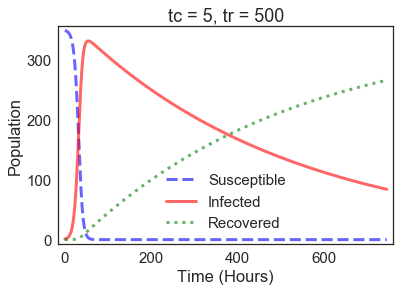

In [169]:
#test run_simulation TIMESERIES

tc = 5      # time between contacts in hours 
tr = 500     # recovery time in hours

beta = 1 / tc      # contact rate in per hour
gamma = 1 / tr     # recovery rate in per hour

system = make_system(beta, gamma)
run_simulation(system, update1)

def plot_results(S, I, R):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (Hours)',
             ylabel='Population',
             title='tc = 5, tr = 500')
    
plot_results(system.S, system.I, system.R)
savefig('Meme-fig01.pdf')

In [170]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add three Series objects to the System: S, I, R
    
    system: System object
    update_func: function that updates state
    """
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()

    state = system.init
    t0 = system.t0
    S[t0], I[t0], R[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], R[t+1] = state
    
    system.S = S * 350
    system.I = I * 350
    system.R = R * 350
    return system

In [176]:
beta_array = linspace(1,50,50)

for beta in beta_array:
    sir = make_system(beta,gamma)
    run_simulation(sir, update1)
    print(sir.beta, clc_total_infected(sir))

NameError: name 'clc_total_infected' is not defined

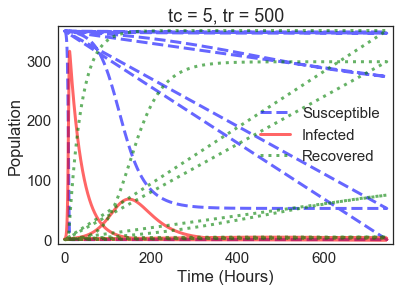

In [172]:
#test run_simulation TIMESERIES PROB

p1_array = linspace(1,51,5)

for p1 in p1_array:
    tc1 = p1      # time between contacts in hours 
    tr1 = 30     # recovery time in hours

    beta1 = 1 / tc1      # contact rate in per hour
    gamma1 = 1 / tr1     # recovery rate in per hour
    
    system = make_system(beta1 , gamma1)
    system = run_simulation(system, update1)

    plot_results(system.S, system.I, system.R)
    #savefig('Meme-fig01.pdf')

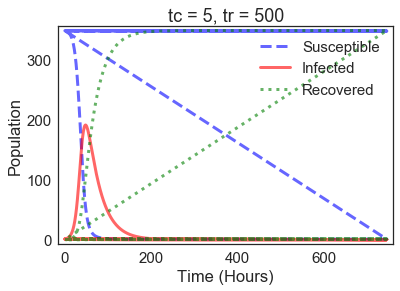

In [173]:
#testing 10/25/17
p2_array = linspace(1,51,5)

for p2 in p2_array:
    tc2 = p2      # time between contacts in hours 
    tr2 = 30     # recovery time in hours

    beta2 = 1 / tc2      # contact rate in per hour
    gamma2 = 1 / tr2     # recovery rate in per hour
    
    system = make_system(beta2 /5, gamma2)
    system = run_simulation(system, update1)
    
    

    plot_results(system.S, system.I, system.R)
    #savefig('Meme-fig01.pdf')

In [174]:
#testing 10/25/17
p3_array = linspace(1,51,5)
#parameter sweep for 
for p3 in p3_array:
    tc3 = p3      # time between contacts in hours 
    
    beta3 = 1 / tc3      # contact rate in per hour
    gamma3 = 1 / 30     # recovery rate in per hour
    
    system = make_system(beta3, gamma2)
    system = run_simulation(system, update1)
    
    total_S += system.S
    toatl_I += system.I
    total_R += system.R

    plot_results(system.S, system.I, system.R)
    #savefig('Meme-fig01.pdf')

NameError: name 'total_S' is not defined

### Data Frame

In [7]:
#Change values for new project
def calc_total_infected(system):
    """Fraction of population infected during the simulation.
    
    system: System object with results.
    
    returns: fraction of population
    """
    frame = system.results
    return frame.S[system.t0] - frame.S[system.t_end]

In [8]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a DataFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    frame = DataFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.loc[t+1] = update_func(frame.loc[t], system)
    
    system.results = frame
    return system.results

In [39]:
p1_array = linspace(.1,.9,10)
gamma_array = linspace(.1, .9, 5)

gamma = .002

def sweep_beta(p1_array, gamma):
    sweep = SweepSeries()
    for p1 in p1_array:
        """
        tc1 = p1      # time between contacts in hours 
        tr1 = gamma #30     # recovery time in hours

        beta1 = 1 / tc1      # contact rate in per hour
        gamma1 = 1 / tr1     # recovery rate in per hour
        """
        sir = make_system(p1, gamma)
        run_simulation(sir, update1)
        sweep[sir.beta] = calc_total_infected(sir) * 350
    return sweep

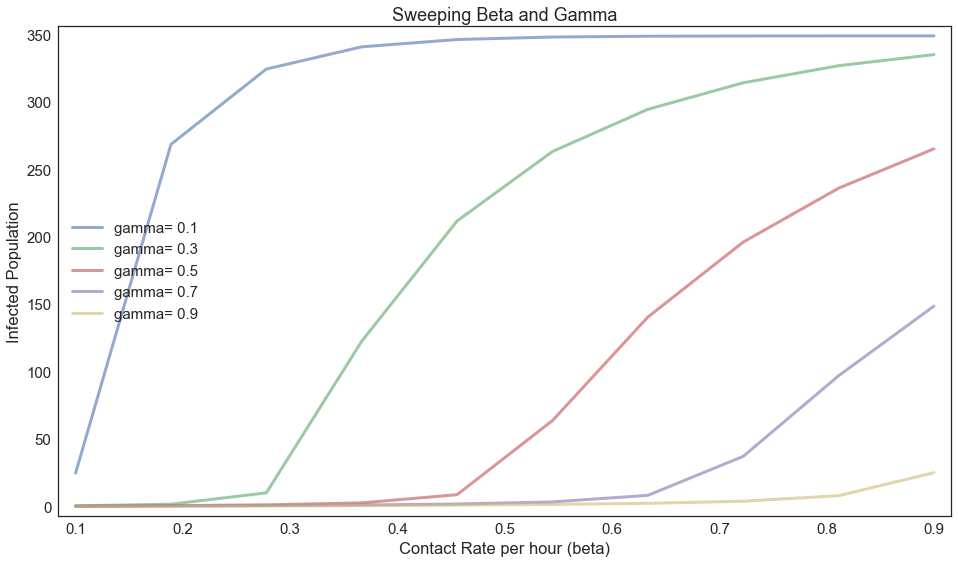

In [49]:
#infected_sweep = sweep_beta(p1_array, .2)

for gamma in gamma_array: 
    infected_sweep = sweep_beta(p1_array, gamma)
    label = 'gamma= ' + str(gamma)
    plot(infected_sweep, label=label)
    decorate(xlabel='Contact Rate per hour (beta)',
            ylabel='Infected Population',
            title='Sweeping Beta and Gamma')
    plt.rcParams["figure.figsize"] = [16,9]


In [21]:
sweep_beta(p1_array, gamma)

,value
0.000002,0.000002
0.022224,0.995735
0.044446,0.997143
0.066668,0.997143
0.088890,0.997143
0.111112,0.997143
0.133334,0.997143
0.155556,0.997143
0.177778,0.997143
0.200000,0.997143


### Metrics

In [ ]:
#Change values for new project
def calc_total_infected(system):
    """Fraction of population infected during the simulation.
    
    system: System object with results.
    
    returns: fraction of population
    """
    frame = system.results
    return frame.S[system.t0] - frame.S[system.t_end]

In [ ]:
#Test calc_total_infected
system.beta = 0.333
system.gamma = 0.25
run_simulation(system, update1)
print(system.beta, system.gamma, calc_total_infected(system))

### Parameter Sweep

In [175]:
beta_array = linspace(.1u)

SyntaxError: invalid syntax (<ipython-input-175-dcaf37e64887>, line 1)